# Multi layer perceptron

In [2]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds = load_iris()
#iris_ds


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.DataFrame(iris_ds.data)
iris.columns = iris_ds.feature_names
iris['class'] = iris_ds.target
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
X = iris.drop('class', axis=1).values
y = iris["class"].values

X_min = X.min(axis=0)[None,:]
X_max = X.max(axis=0)[None,:]
X_mean = X.mean(axis=0)[None,:]
X_std = X.std(axis=0)[None,:]

y_max = y.max()

#X = (X - X_min) / (X_max - X_min) *y_max
X = (X - X_mean) / X_std 
X = np.minimum(5., X)
X = np.maximum(-5., X)
X = X


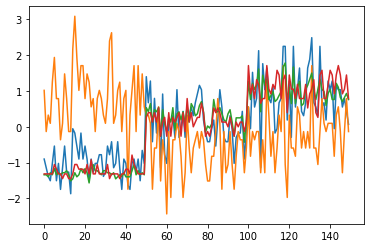

(-2.43394714190809, 3.0907752482994253)

In [9]:
import matplotlib.pyplot as plt

plt.plot(X)
plt.show()

X.min(), X.max()


In [93]:
N = len(X)
idx = np.arange(N)
np.random.shuffle(idx)
idx_train = idx[:N//5*4]
idx_test = idx[N//5*4:]
idx.shape, idx_train.shape, idx_test.shape


((150,), (120,), (30,))

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   
X_train, X_test = X[idx_train,:], X[idx_test,:]
y_train, y_test = y[idx_train], y[idx_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [95]:
np.savetxt("data/X_train.csv", X_train, delimiter=",")
np.savetxt("data/X_test.csv", X_test, delimiter=",")
np.savetxt("data/y_train.csv", y_train, delimiter=",")
np.savetxt("data/y_test.csv", y_test, delimiter=",")


In [96]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [97]:
prediction = clf.predict(X_test)
pd.DataFrame({"pred": prediction, "test": y_test}).T


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
pred,2,1,0,2,1,0,0,1,2,0,...,1,1,1,2,2,0,1,2,1,0
test,2,1,0,2,1,0,0,1,2,0,...,1,1,1,2,2,0,1,2,1,0


In [98]:
from sklearn.metrics import accuracy_score
print('MLP accuracy:',accuracy_score(prediction,y_test))


MLP accuracy: 0.9666666666666667


In [99]:
coefs, intercepts = np.concatenate(clf.coefs_), np.concatenate(clf.intercepts_)
print(coefs.shape, intercepts.shape)

clf.coefs_, clf.intercepts_, coefs.min(), coefs.max()


(10, 3) (9,)


([array([[ 0.26518875, -1.05766314, -2.21479371],
         [ 0.30588575,  0.46051159,  0.91145662],
         [-0.46351603, -9.4624696 , -0.53253178],
         [ 0.15693035,  2.47094449,  8.43154361]]),
  array([[ 0.04968117, -0.22630792,  0.12060684],
         [-1.65578007,  0.37851825,  2.47837903],
         [ 6.4633065 ,  0.45165921, -0.3705908 ]]),
  array([[-7.40431736, -3.43680621, 10.01534354],
         [-9.69209843, 10.56019775, -0.91340231],
         [ 7.87175529, -3.43312061, -4.35753477]])],
 [array([-0.98692281,  7.1401457 , -3.17428943]),
  array([12.79683109, 13.09355612, -2.97434298]),
  array([ 2.79185934,  5.04799285, -7.76102244])],
 -9.692098434449832,
 10.560197747579492)

In [100]:
np.savetxt("data/coefs.csv", coefs, delimiter=",")
np.savetxt("data/intercepts.csv", intercepts, delimiter=",")


In [101]:
tmp1 = X.T[:,None,:] * coefs[:4,:,None]
print(tmp1.shape, tmp1.min(), tmp1.max())
tmp1.max(axis=2), tmp1.min(axis=2)


(4, 3, 150) -16.89838057141918 14.833142462117817


(array([[ 0.66085546,  1.97785559,  4.14171768],
        [ 0.9454241 ,  1.42333781,  2.81710757],
        [ 0.72659671, 14.83314246,  0.83478416],
        [ 0.26867982,  4.23049403, 14.43561161]]),
 array([[ -0.49590937,  -2.63571685,  -5.51930845],
        [ -0.74450975,  -1.12086086,  -2.21843724],
        [ -0.82776173, -16.89838057,  -0.95101226],
        [ -0.22709022,  -3.57564565, -12.20108844]]))

In [102]:
tst1 = tmp1.sum(axis=0) + intercepts[:3][:,None]
print(tst1.shape, tst1.min(), tst1.max())
tst1.max(axis=1), tst1.min(axis=1)


(3, 150) -12.070864933045826 20.89156114590106


(array([ 0.34219737, 20.89156115,  9.86635003]),
 array([ -1.97562163,  -9.04247094, -12.07086493]))

In [103]:
act1 = np.maximum(0, tst1)
print(act1.shape, act1.min(), act1.max())
act1.max(axis=1), act1.min(axis=1)


(3, 150) 0.0 20.89156114590106


(array([ 0.34219737, 20.89156115,  9.86635003]), array([0., 0., 0.]))

In [104]:
tmp2 = act1[:,None,:] * coefs[4:7,:,None]
print(tmp2.shape, tmp2.min(), tmp2.max())
tmp2.max(axis=2), tmp2.min(axis=2)


(3, 3, 150) -34.59183057786514 63.76924422117654


(array([[ 1.70007654e-02, -0.00000000e+00,  4.12713443e-02],
        [-0.00000000e+00,  7.90783719e+00,  5.17772070e+01],
        [ 6.37692442e+01,  4.45622788e+00, -0.00000000e+00]]),
 array([[  0.        ,  -0.07744198,   0.        ],
        [-34.59183058,   0.        ,   0.        ],
        [  0.        ,   0.        ,  -3.65637852]]))

In [105]:
tst2 = tmp2.sum(axis=0) + intercepts[3:6][:,None]
print(tst2.shape, tst2.min(), tst2.max())
tst2.max(axis=1), tst2.min(axis=1)


(3, 150) -21.7949994837006 76.56607531534108


(array([76.56607532, 21.00139331, 48.80286399]),
 array([-21.79499948,  13.09355612,  -6.63072149]))

In [106]:
act2 = np.maximum(0, tst2)
print(act2.shape, act2.min(), act2.max())
act2.max(axis=1), act2.min(axis=1)


(3, 150) 0.0 76.56607531534108


(array([76.56607532, 21.00139331, 48.80286399]),
 array([ 0.        , 13.09355612,  0.        ]))

In [107]:
tmp3 = act2[:,None,:] * coefs[7:,:,None]
print(tmp3.shape, tmp3.min(), tmp3.max())
tmp3.max(axis=2), tmp3.min(axis=2)


(3, 3, 150) -566.9195207487883 766.8355479037928


(array([[  -0.        ,   -0.        ,  766.8355479 ],
        [-126.90403476,  221.77886631,  -11.95968437],
        [ 384.16420264,   -0.        ,   -0.        ]]),
 array([[-566.91952075, -263.14276283,    0.        ],
        [-203.5475712 ,  138.27054184,  -19.1827211 ],
        [   0.        , -167.5461184 , -212.66017694]]))

In [108]:
tst3 = tmp3.sum(axis=0) + intercepts[6:][:,None]
print(tst3.shape, tst3.min(), tst3.max())
tst3.max(axis=1), tst3.min(axis=1)


(3, 150) -734.2218954737748 743.044512263503


(array([183.40849078, 118.48623937, 743.04451226]),
 array([-734.22189547,  -72.76558047, -239.60392048]))

In [109]:
from scipy.special import softmax
act3 = softmax(tst3, axis=0)
print(act3.shape, act3.min(), act3.max())
act3.max(axis=1), act3.min(axis=1)


(3, 150) 0.0 1.0


(array([1., 1., 1.]),
 array([0.00000000e+000, 0.00000000e+000, 1.94108259e-184]))

In [112]:
y_temp = np.argmax(tst3[:,idx_test], axis=0)


In [114]:
print('Confirm accuracy:',accuracy_score(y_temp,y_test))


Confirm accuracy: 0.9666666666666667


In [ ]:
X_temp = np.zeros_like(bos)
X_temp[:,0] = 0 # lr.intercept_
X_temp[:,1:] = X*lr.coef_[None,:]

X_stat = pd.DataFrame(X_temp, columns=["Intercept"]+list(bos.columns[:-1])).describe()

print("all min: %f, all max: %f\n"%(X_stat.loc["min"].min(), X_stat.loc["max"].max()))

X_stat


In [ ]:
y_temp = X.dot(lr.coef_) # + lr.intercept_

# print(mean_absolute_error(y, y_temp))

y_stat = pd.DataFrame(y_temp, columns=bos.columns[-1:]).describe()

y_stat


In [ ]:
Z_temp = X_temp.cumsum(axis=1)

Z_stat = pd.DataFrame(Z_temp, columns=X_stat.columns).describe()

print("all min: %f, all max: %f\n"%(Z_stat.loc["min"].min(), Z_stat.loc["max"].max()))

Z_stat


In [ ]:
y_tests = pd.concat([
    pd.read_csv("data/y_test0/y_test.csv", header=None),
    pd.read_csv("data/y_test1/y_test.csv", header=None)], axis=1)

y_tests.columns = ["0","1"]
y_tests["true"] = y_test
y_tests

In [ ]:
y_tests[["0","true"]].plot()
plt.show()
